<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/Oro_Feb-Mar15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pylab import *

In [92]:
datos=pd.read_csv("GOLD-HastaMarzo15.xlsx")
datos=datos.iloc[:,[1,2,3]]
datos["precio"]=(datos.bid+datos.ask)/2
datos=datos.groupby("time").mean()
datos.index=pd.DatetimeIndex(datos.index).strftime("%Y-%m-%d")

In [107]:
lista_dias=datos.index.unique()
dia=[]
for x in range(len(lista_dias)):
  dia.append(datos.loc[lista_dias[x]])

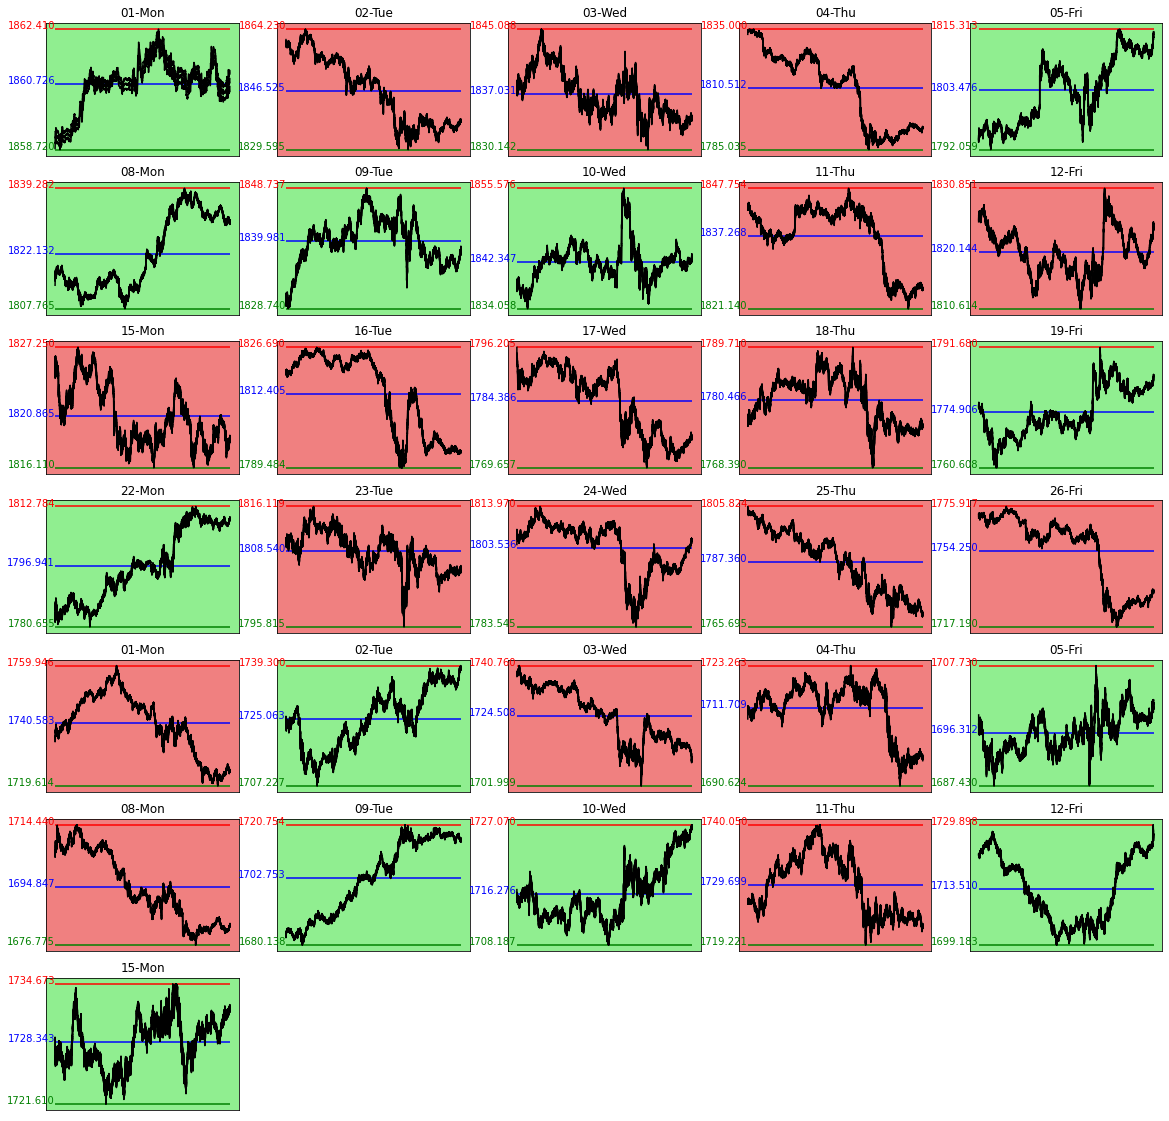

In [124]:
mensual=figure(figsize=(20,20))
lista_maximos,lista_minimos,lista_promedios=[],[],[]
for i in range(0,31):
  maximo=max(dia[i].ask)
  minimo=min(dia[i].bid)
  promedio=dia[i].values.mean()

  lista_maximos.append(maximo)
  lista_minimos.append(minimo)
  lista_promedios.append(promedio)

  if dia[i].precio[0]<dia[i].precio[-1]:
    color_fondo="lightgreen"
  else:
    color_fondo="lightcoral"
    
  subplot(7,5,i+1,frameon=True,xticks=[],yticks=[],facecolor=color_fondo)
  title(pd.to_datetime(lista_dias[i]).strftime("%d-%a"))

    
  plot(dia[i].values,color="k")

  text(0,maximo,"%.3f"%maximo,color="r",ha="right") #MAXIMO DEL DIA
  hlines(maximo,0,len(dia[i]),colors="r")
  text(0,minimo,"%.3f"%minimo,color="g",ha="right") # MINIMO DEL DIA
  hlines(minimo,0,len(dia[i]),colors="g")
  text(0,promedio,"%.3f"%promedio,color="b",ha="right") #PROMEDIO DEL DIA
  hlines(promedio,0,len(dia[i]),colors="b") 